In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.shape

(113937, 81)

In [5]:
df.duplicated().any()

False

In [76]:
loans= ['ListingNumber','Term', 'LoanStatus','StatedMonthlyIncome','EmploymentStatus',
'ListingCategory (numeric)','Occupation', 'LoanOriginalAmount',"EstimatedReturn","BorrowerAPR",'ProsperScore','DebtToIncomeRatio',
'CurrentCreditLines', 'IsBorrowerHomeowner']

In [77]:
df[loans].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   StatedMonthlyIncome        113937 non-null  float64
 4   EmploymentStatus           111682 non-null  object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   Occupation                 110349 non-null  object 
 7   LoanOriginalAmount         113937 non-null  int64  
 8   EstimatedReturn            84853 non-null   float64
 9   BorrowerAPR                113912 non-null  float64
 10  ProsperScore               84853 non-null   float64
 11  DebtToIncomeRatio          105383 non-null  float64
 12  CurrentCreditLines         106333 non-null  float64
 13  IsBorrowerHomeowner        11

In [8]:
loans = df[loans]

In [9]:
loans.head()

,ListingNumber,Term,LoanStatus,StatedMonthlyIncome,EmploymentStatus,ListingCategory (numeric),Occupation,LoanOriginalAmount,EstimatedReturn,BorrowerAPR,ProsperScore,DebtToIncomeRatio,CurrentCreditLines,IsBorrowerHomeowner
0,193129,36,Completed,3083.333333,Self-employed,0,Other,9425,NaN,0.16516,NaN,0.17,5.0,True
1,1209647,36,Current,6125.000000,Employed,2,Professional,10000,0.05470,0.12016,7.0,0.18,14.0,False
2,81716,36,Completed,2083.333333,Not available,0,Other,3001,NaN,0.28269,NaN,0.06,NaN,False
3,658116,36,Current,2875.000000,Employed,16,Skilled Labor,10000,0.06000,0.12528,9.0,0.15,5.0,True
4,909464,36,Current,9583.333333,Employed,2,Executive,15000,0.09066,0.24614,4.0,0.26,19.0,True


In [10]:
loans.describe()

,ListingNumber,Term,StatedMonthlyIncome,ListingCategory (numeric),LoanOriginalAmount,EstimatedReturn,BorrowerAPR,ProsperScore,DebtToIncomeRatio,CurrentCreditLines
count,1.139370e+05,113937.000000,1.139370e+05,113937.000000,113937.00000,84853.000000,113912.000000,84853.000000,105383.000000,106333.000000
mean,6.278857e+05,40.830248,5.608026e+03,2.774209,8337.01385,0.096068,0.218828,5.950067,0.275947,10.317192
std,3.280762e+05,10.436212,7.478497e+03,3.996797,6245.80058,0.030403,0.080364,2.376501,0.551759,5.457866
min,4.000000e+00,12.000000,0.000000e+00,0.000000,1000.00000,-0.182700,0.006530,1.000000,0.000000,0.000000
25%,4.009190e+05,36.000000,3.200333e+03,1.000000,4000.00000,0.074080,0.156290,4.000000,0.140000,7.000000
50%,6.005540e+05,36.000000,4.666667e+03,1.000000,6500.00000,0.091700,0.209760,6.000000,0.220000,10.000000
75%,8.926340e+05,36.000000,6.825000e+03,3.000000,12000.00000,0.116600,0.283810,8.000000,0.320000,13.000000
max,1.255725e+06,60.000000,1.750003e+06,20.000000,35000.00000,0.283700,0.512290,11.000000,10.010000,59.000000


In [79]:
   def listing_category_alpha(ListingCategoryNumeric):
    if ListingCategoryNumeric==0:
        category = 'Not Available'
    if ListingCategoryNumeric==1:
        category = 'Debt Consolidation'
    if ListingCategoryNumeric==2:
        category = 'Home Improvement'
    if ListingCategoryNumeric==3:
        category = 'Business'
    if ListingCategoryNumeric==4:
        category = 'Personal Loan'
    if ListingCategoryNumeric==5:
        category = 'Student Use'
    if ListingCategoryNumeric==6:
        category = 'Auto'
    if ListingCategoryNumeric==7:
        category = 'Other'
    if ListingCategoryNumeric==8:
        category = 'Baby&Adoption'
    if ListingCategoryNumeric==9:
        category = 'Boat'
    if ListingCategoryNumeric==10:
        category = 'Cosmetic Procedure'
    if ListingCategoryNumeric==11:
        category = 'Engagement Ring'
    if ListingCategoryNumeric==12:
        category = 'Green Loans'
    if ListingCategoryNumeric==13:
        category = 'Household Expanses'
    if ListingCategoryNumeric==14:
        category = 'Large Purchases'
    if ListingCategoryNumeric==15:
        category = 'Medical/Dental'
    if ListingCategoryNumeric==16:
        category = 'Motorcycle'
    if ListingCategoryNumeric==17:
        category = 'RV'
    if ListingCategoryNumeric==18:
        category = 'Taxes'
    if ListingCategoryNumeric==19:
        category = 'Vacation'
    if ListingCategoryNumeric==20:
        category = 'Wedding Loans'
    return category

In [80]:
loans_clean['ListingCategory']=loans_clean['ListingCategory (numeric)'].apply(listing_category_alpha)
#Check results
loans_clean['ListingCategory'].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expanses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Baby&Adoption', 'Engagement Ring',
       'Business', 'Large Purchases', 'Boat', 'RV', 'Not Available',
       'Cosmetic Procedure', 'Student Use', 'Green Loans'], dtype=object)

# Cleaning

In [11]:
loans.isnull().sum()

ListingNumber                    0
Term                             0
LoanStatus                       0
StatedMonthlyIncome              0
EmploymentStatus              2255
ListingCategory (numeric)        0
Occupation                    3588
LoanOriginalAmount               0
EstimatedReturn              29084
BorrowerAPR                     25
ProsperScore                 29084
DebtToIncomeRatio             8554
CurrentCreditLines            7604
IsBorrowerHomeowner              0
dtype: int64

In [12]:
loans_clean=loans.dropna()

In [13]:
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              76224 non-null  int64  
 1   Term                       76224 non-null  int64  
 2   LoanStatus                 76224 non-null  object 
 3   StatedMonthlyIncome        76224 non-null  float64
 4   EmploymentStatus           76224 non-null  object 
 5   ListingCategory (numeric)  76224 non-null  int64  
 6   Occupation                 76224 non-null  object 
 7   LoanOriginalAmount         76224 non-null  int64  
 8   EstimatedReturn            76224 non-null  float64
 9   BorrowerAPR                76224 non-null  float64
 10  ProsperScore               76224 non-null  float64
 11  DebtToIncomeRatio          76224 non-null  float64
 12  CurrentCreditLines         76224 non-null  float64
 13  IsBorrowerHomeowner        76224 non-null  bo

# Term

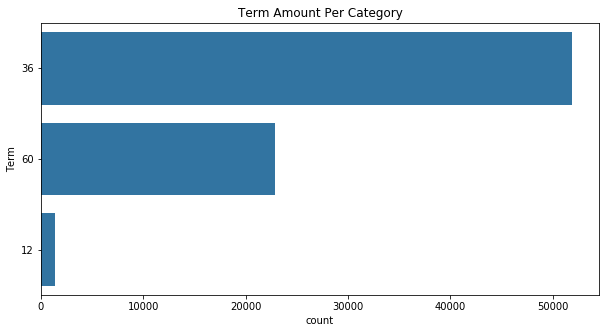

In [14]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("Term Amount Per Category")
sb.countplot(data = loans_clean, y = 'Term', color = base_color,
             order = loans_clean['Term'].value_counts().index);

# ListingCategory

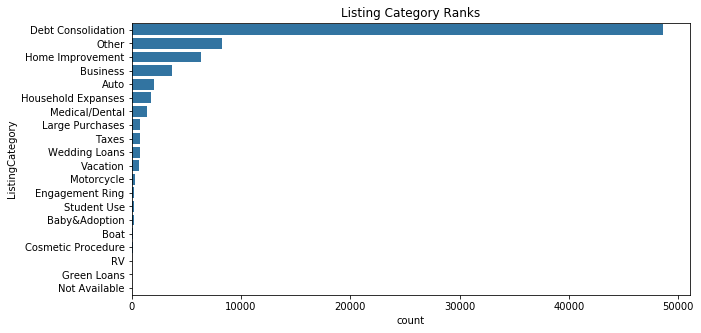

In [84]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("Listing Category Ranks")
sb.countplot(data = loans_clean, y = 'ListingCategory', color = base_color,
             order = loans_clean['ListingCategory'].value_counts().index);

In [88]:
loans_clean['ListingCategory'].value_counts(normalize=True)*100

Debt Consolidation    63.771253
Other                 10.864032
Home Improvement       8.301847
Business               4.781958
Auto                   2.665827
Household Expanses     2.318168
Medical/Dental         1.813077
Large Purchases        1.042979
Taxes                  1.027236
Wedding Loans          0.957704
Vacation               0.934089
Motorcycle             0.379146
Engagement Ring        0.263696
Student Use            0.263696
Baby&Adoption          0.250577
Boat                   0.108890
Cosmetic Procedure     0.107578
RV                     0.064284
Green Loans            0.059037
Not Available          0.024927
Name: ListingCategory, dtype: float64

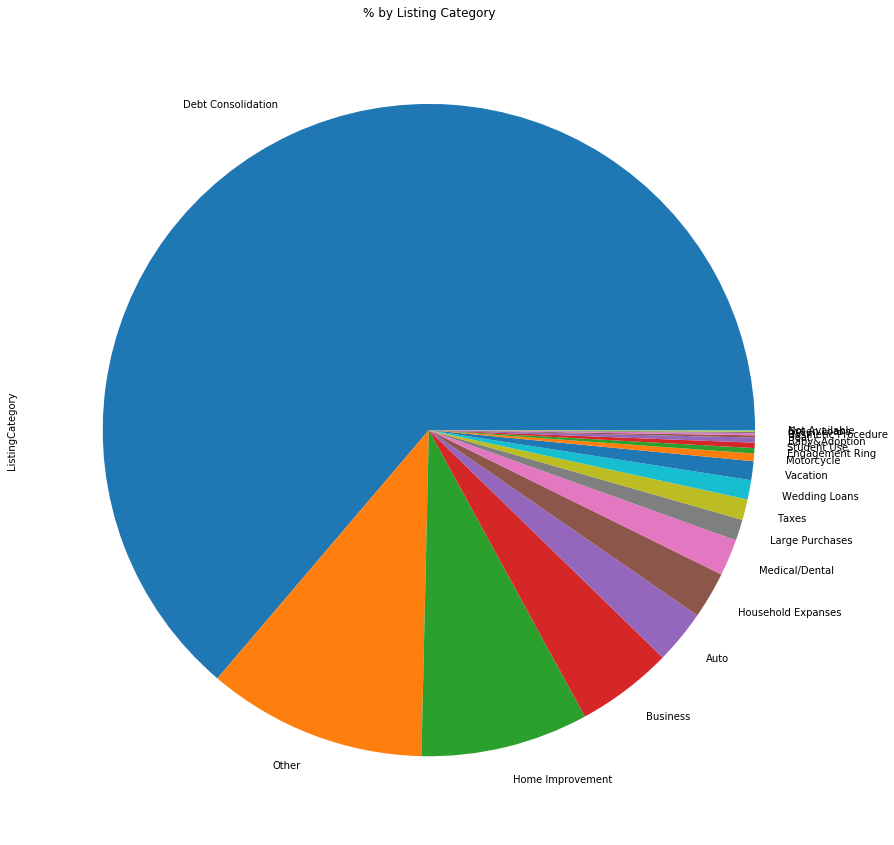

In [101]:
loans_clean['ListingCategory'].value_counts(normalize=True).plot(kind='pie', figsize=[25,15], title= '% by Listing Category')

# Loan Status

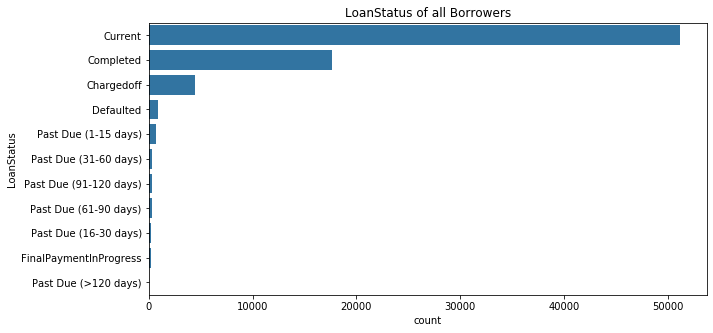

In [40]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loans_clean, y = 'LoanStatus', color = base_color,
             order = loans_clean['LoanStatus'].value_counts().index);

# Origional Loan Amount

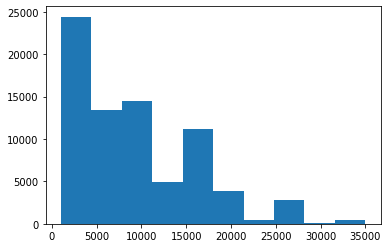

In [17]:
plt.hist(data = loans_clean, x = 'LoanOriginalAmount');

In [18]:
(loans_clean['LoanOriginalAmount'].describe())

count    76224.000000
mean      9294.811018
std       6413.578876
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

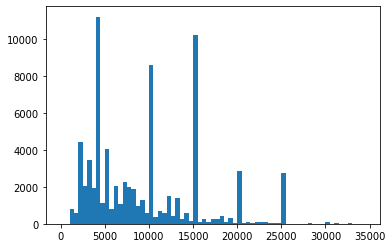

In [19]:
bins_smi = np.arange(0, 35000, 500)
plt.hist(data = loans_clean, x = 'LoanOriginalAmount', bins=bins_smi);

# Borrower APR

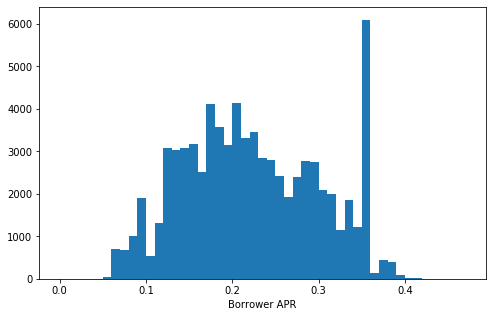

In [20]:
bins = np.arange(0, loans_clean.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loans_clean, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

# Prosper Score

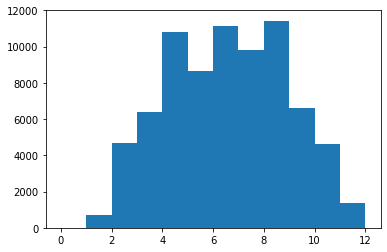

In [21]:
bins_smi = np.arange(0, 13, 1)
plt.hist(data = loans_clean, x = 'ProsperScore', bins=bins_smi);

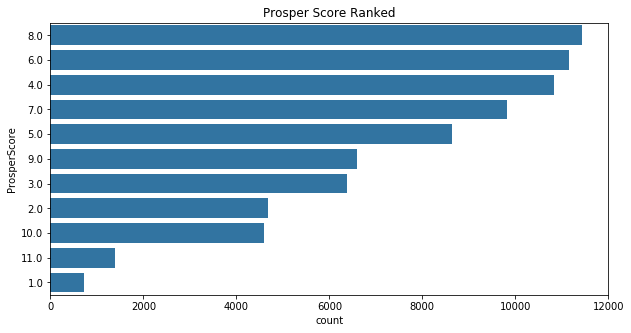

In [22]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("Prosper Score Ranked")
sb.countplot(data = loans_clean, y = 'ProsperScore', color = base_color,
             order = loans_clean['ProsperScore'].value_counts().index);

# Estimated Reture

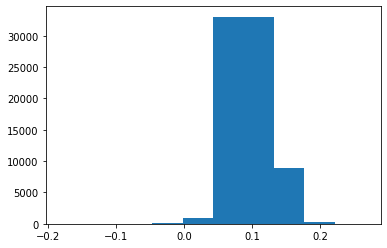

In [23]:
plt.hist(data = loans_clean, x = 'EstimatedReturn');

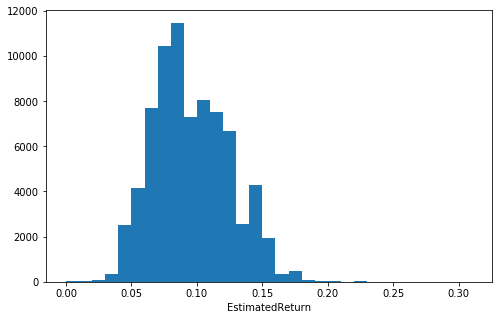

In [24]:
bins = np.arange(0, loans_clean.EstimatedReturn.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loans_clean, x = 'EstimatedReturn', bins = bins); plt.xlabel('EstimatedReturn');

# Stated Monthly Income

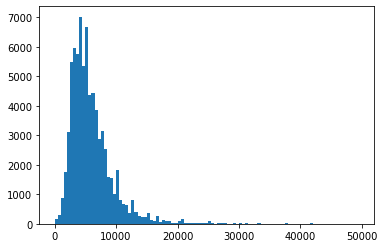

In [25]:
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loans_clean, x = 'StatedMonthlyIncome', bins=bins_smi);

In [26]:
(loans_clean['StatedMonthlyIncome'].describe())

count     76224.000000
mean       6003.001652
std        5110.685475
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

# Employment Status

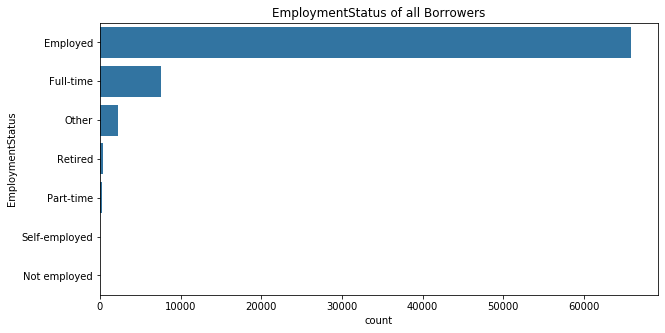

In [27]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loans_clean, y = 'EmploymentStatus', color = base_color,
             order = loans_clean['EmploymentStatus'].value_counts().index);

# Occupation

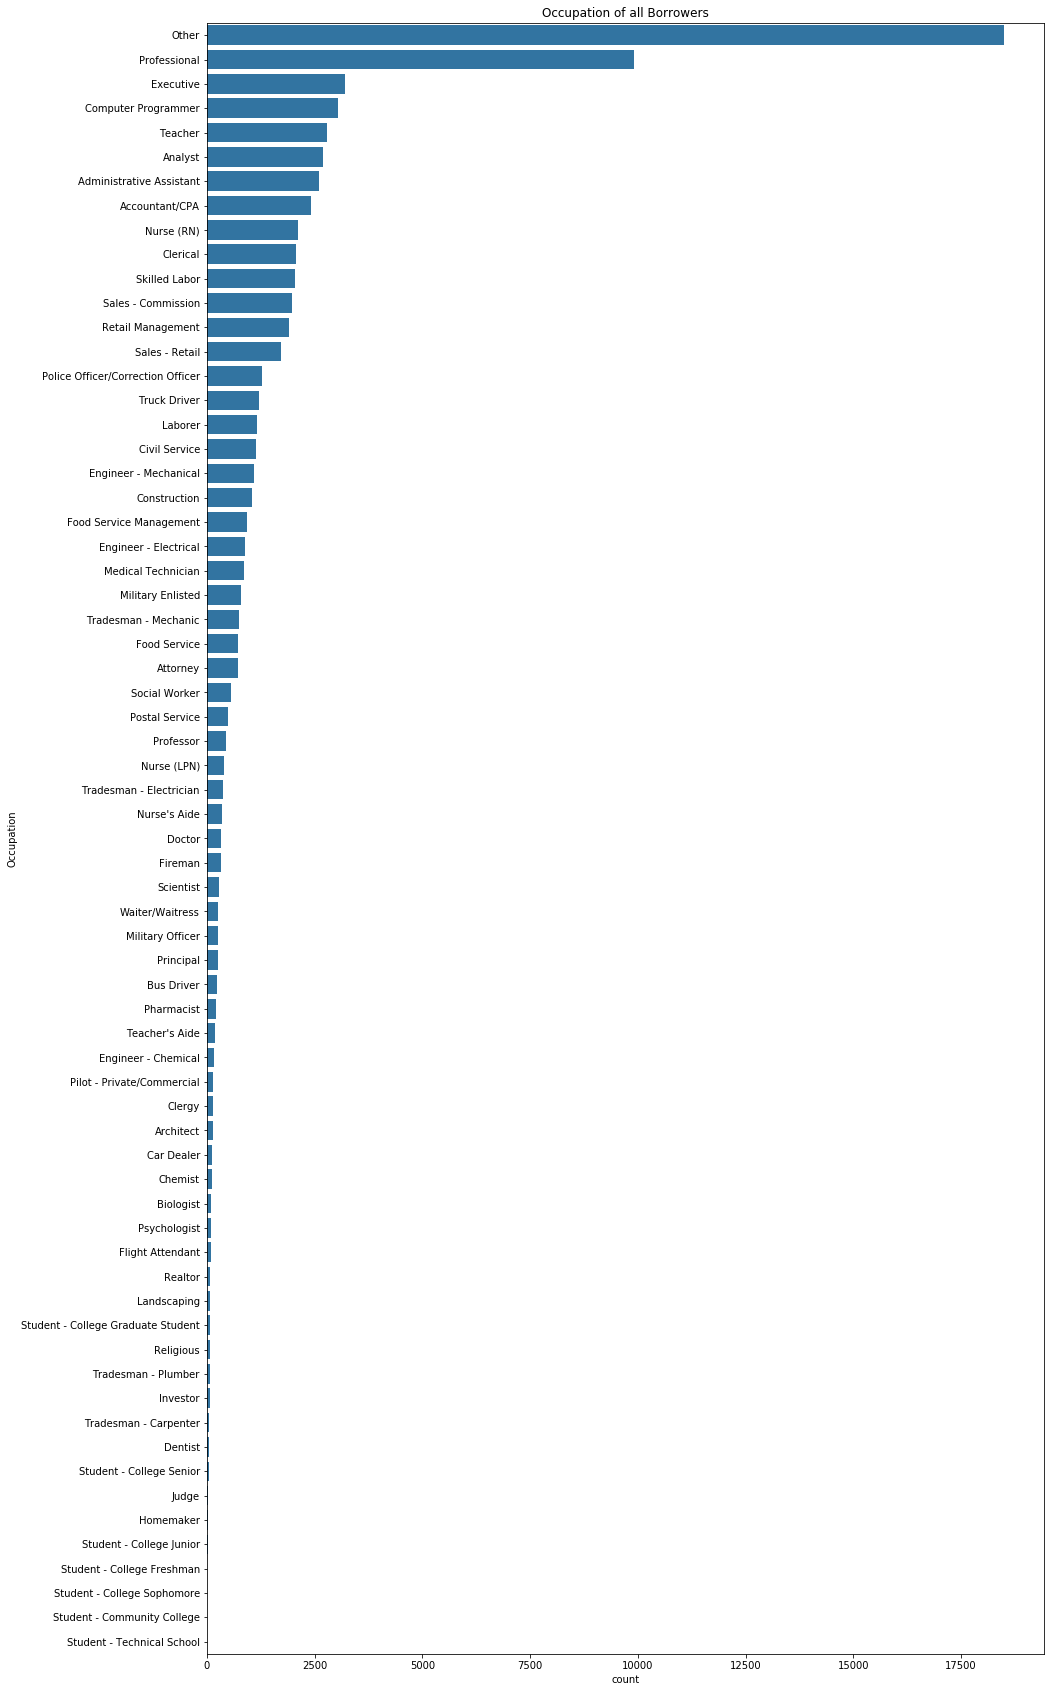

In [28]:
plt.figure(figsize = [15, 30]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loans_clean, y = 'Occupation', color = base_color,
             order = loans_clean['Occupation'].value_counts().index );
plt.title("Occupation of all Borrowers");

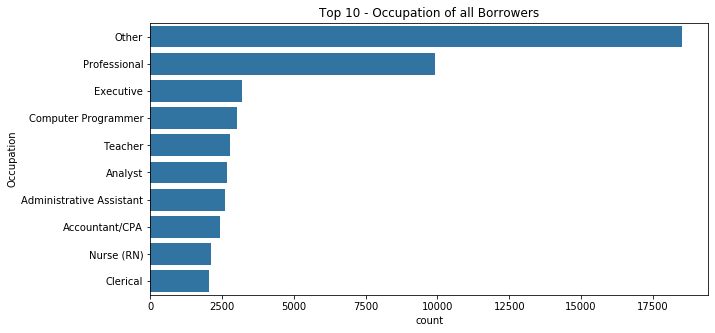

In [29]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loans_clean, y = 'Occupation', color = base_color,
             order = loans_clean['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

# Home ownership

(True     54.393629
 False    45.606371
 Name: IsBorrowerHomeowner, dtype: float64,
 Text(0, 0.5, '%'))

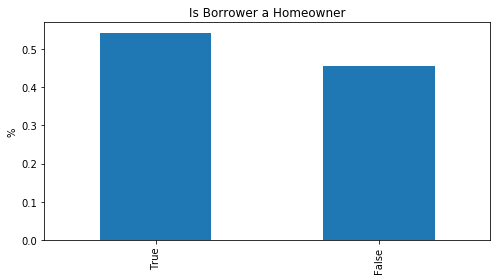

In [73]:
loans_clean['IsBorrowerHomeowner'].value_counts(normalize=True)*100, loans_clean['IsBorrowerHomeowner'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Is Borrower a Homeowner').set_ylabel('%')

# Debt To Income Ratio

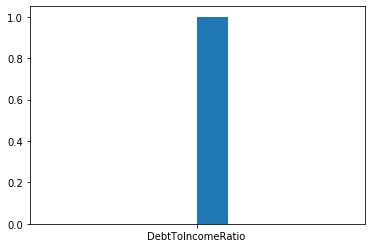

In [32]:
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio ');

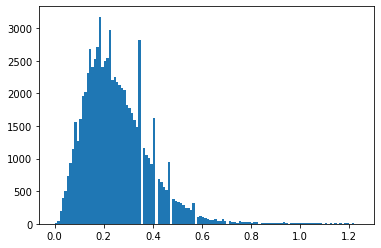

In [33]:
bins_smi = np.arange(0, 1.25, .01)
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins=bins_smi);

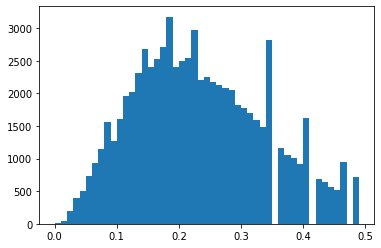

In [34]:
bins_smi = np.arange(0, .5, .01)
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins=bins_smi);

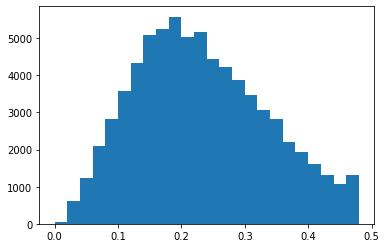

In [35]:
bins_smi = np.arange(0, .5, .02)
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins=bins_smi);

# Current Credit Lines 

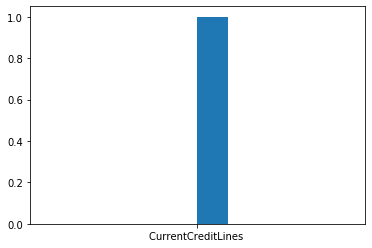

In [36]:
plt.hist(data = loans_clean, x = 'CurrentCreditLines ');         


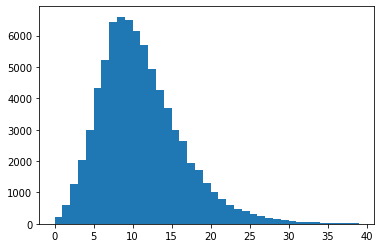

In [37]:
bins_smi = np.arange(0, 40, 1)
plt.hist(data = loans_clean, x = 'CurrentCreditLines', bins=bins_smi);

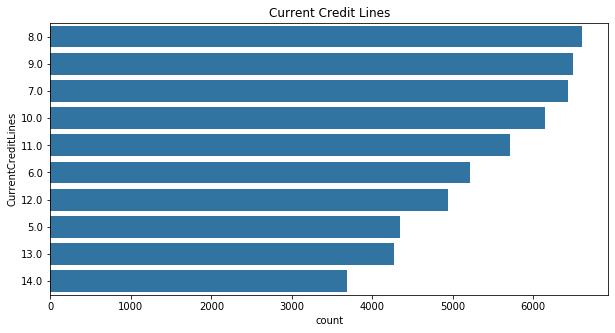

In [38]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loans_clean, y = 'CurrentCreditLines', color = base_color,
             order = loans_clean['CurrentCreditLines'].value_counts().head(10).index );
plt.title("Current Credit Lines");

# Data Interactions

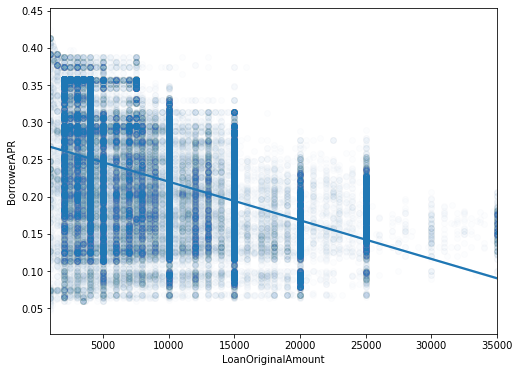

In [39]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loans_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

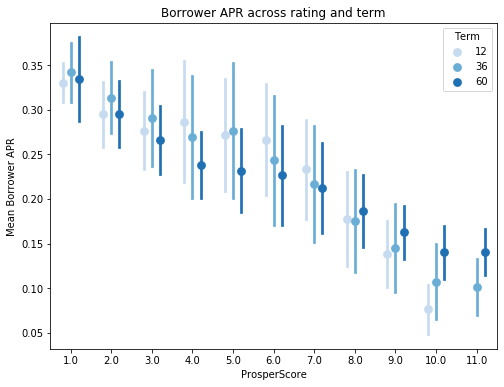

In [44]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans_clean, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

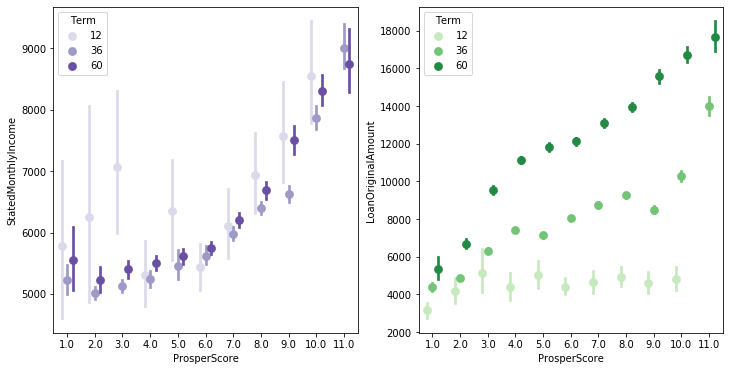

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loans_clean, x = 'ProsperScore', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loans_clean, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

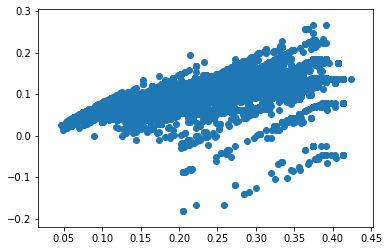

In [56]:
plt.scatter(loans_clean["BorrowerAPR"],loans_clean["EstimatedReturn"])

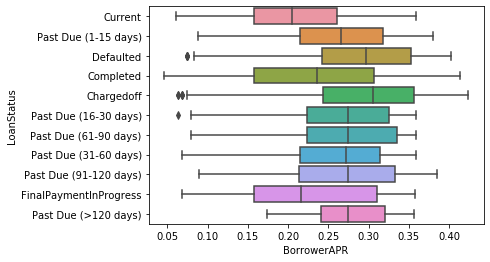

In [59]:
sb.boxplot(data = loans_clean, y='LoanStatus',x = 'BorrowerAPR')

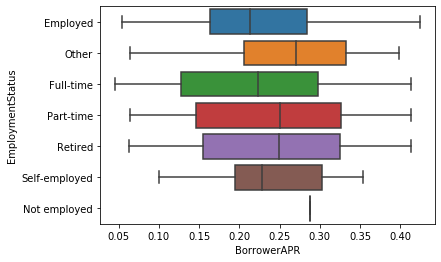

In [61]:
sb.boxplot(data = loans_clean, y='EmploymentStatus',x = 'BorrowerAPR')